In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import u

# Data Generation

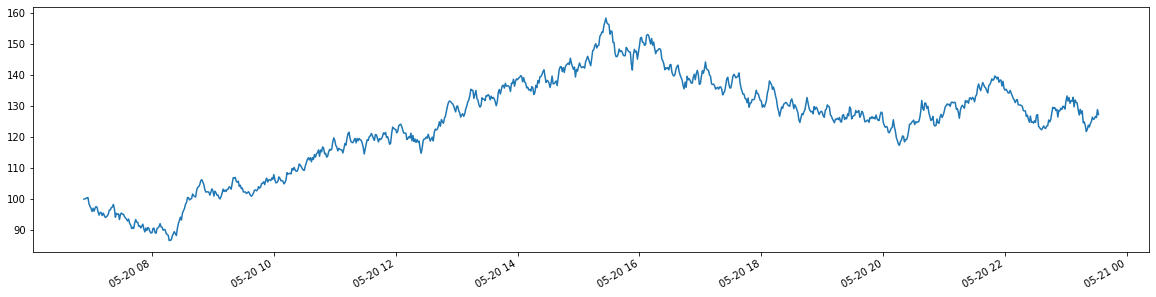

<AxesSubplot:>

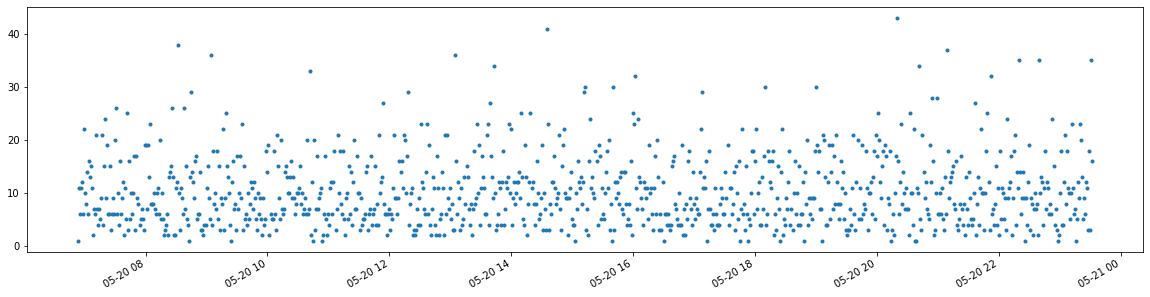

In [3]:
plt.rcParams["figure.figsize"] = (20, 5)

data = u.create_price_data(theta=0.0001, start_price=100, n_samples=1000)
data = u.add_volume_data(data, mu=10, var=50)
data = u.add_dir_data(data)

data["close"].plot.line()
plt.show()
data["volume"].plot(style=".")

# Tick Imbalance Bars

In [11]:
tick_imbalance_bars = bars.create_tick_imbalance_bars(
    data, expected_length=10, expected_abs_inbalance=0.25
)
tick_imbalance_bars.head(8)

,volume,open,close,high,low
index,,,,,
2022-05-20 06:52:59.413139,18.0,100.00,100.26,100.26,100.00
2022-05-20 06:55:59.413139,180.0,100.42,94.68,100.48,94.68
2022-05-20 07:11:59.413139,105.0,95.47,97.44,97.44,94.09
2022-05-20 07:21:59.413139,262.0,98.29,91.22,98.29,90.50
2022-05-20 07:47:59.413139,489.0,91.39,100.52,100.52,86.59
2022-05-20 08:35:59.413139,1106.0,100.40,111.33,111.33,99.71
2022-05-20 10:25:59.413139,2917.0,111.00,146.10,146.10,109.29
2022-05-20 15:09:59.413139,3062.0,145.05,121.41,158.43,121.41


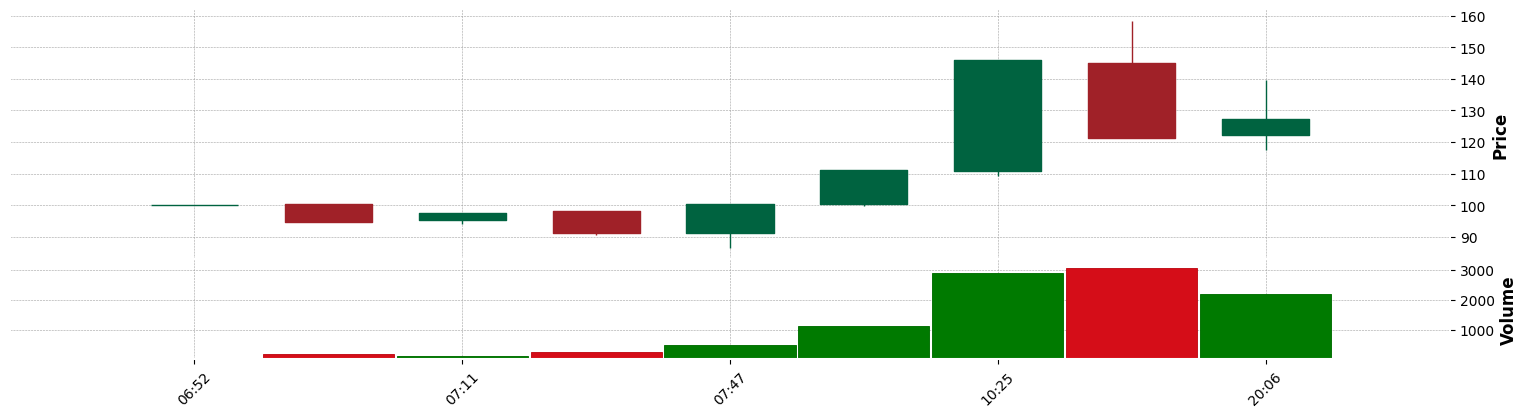

In [12]:
mplf.plot(
    tick_imbalance_bars, type="candle", style="charles", figsize=(20, 5), volume=True
)

# Volume Imbalance Bars

In [18]:
data["dv"] = data["close"] * data["volume"]

In [19]:
mean_hourly_volume = np.mean(data.resample("H")["volume"].sum())
volume_imbalance_bars = bars.create_volume_imbalance_bars(
    data,
    expected_length=10,
    min_observation_weight=0.01,
    expected_abs_inbalance=mean_hourly_volume / 5,
    max_length=100,
)
volume_imbalance_bars.head(8)

,volume,open,close,high,low,dv
index,,,,,,
2022-05-20 06:52:59.413139,1030.0,100.00,96.92,100.48,86.59,96239.33
2022-05-20 08:32:59.413139,10.0,98.30,98.30,98.30,98.30,983.00
2022-05-20 08:33:59.413139,77.0,98.86,101.64,101.64,98.86,7730.97
2022-05-20 08:40:59.413139,66.0,101.09,104.01,104.01,100.67,6811.85
2022-05-20 08:46:59.413139,37.0,104.61,106.29,106.29,104.61,3908.88
2022-05-20 08:49:59.413139,90.0,105.55,100.97,105.55,100.97,9265.99
2022-05-20 09:01:59.413139,50.0,102.56,101.28,102.56,101.28,5079.32
2022-05-20 09:04:59.413139,105.0,101.34,103.20,103.22,100.04,10709.32


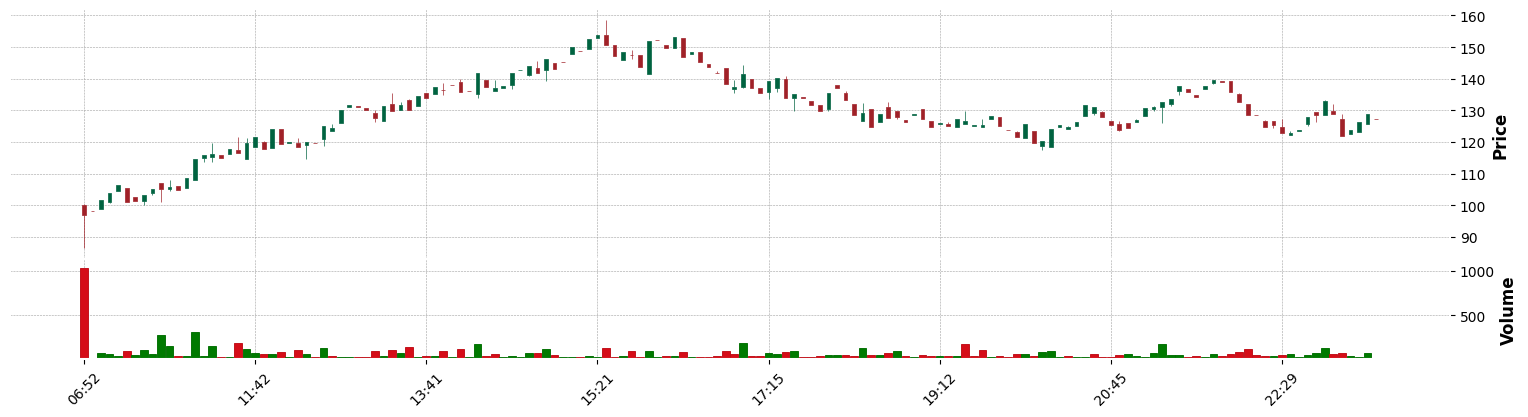

In [20]:
mplf.plot(
    volume_imbalance_bars, type="candle", style="charles", figsize=(20, 5), volume=True
)

# Dollar Imbalance Bars

In [21]:
mean_hourly_dv = np.mean(data.resample("H")["dv"].sum())
dv_imbalance_bars = bars.create_dollar_volume_imbalance_bars(
    data,
    expected_length=10,
    min_observation_weight=0.01,
    expected_abs_inbalance=mean_hourly_dv / 5,
    max_length=100,
)
dv_imbalance_bars.head(8)

,volume,open,close,high,low,dv
index,,,,,,
2022-05-20 06:52:59.413139,1030.0,100.00,96.92,100.48,86.59,96239.33
2022-05-20 08:32:59.413139,10.0,98.30,98.30,98.30,98.30,983.00
2022-05-20 08:33:59.413139,77.0,98.86,101.64,101.64,98.86,7730.97
2022-05-20 08:40:59.413139,66.0,101.09,104.01,104.01,100.67,6811.85
2022-05-20 08:46:59.413139,37.0,104.61,106.29,106.29,104.61,3908.88
2022-05-20 08:49:59.413139,90.0,105.55,100.97,105.55,100.97,9265.99
2022-05-20 09:01:59.413139,72.0,102.56,100.43,102.56,100.43,7292.42
2022-05-20 09:06:59.413139,63.0,100.04,102.93,103.22,100.04,6434.95


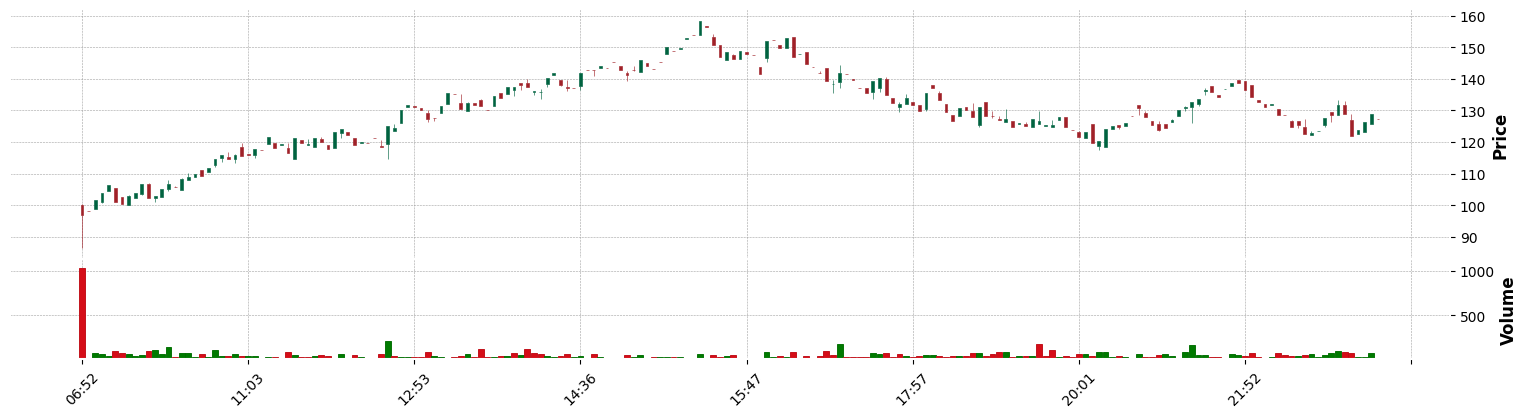

In [22]:
mplf.plot(
    dv_imbalance_bars, type="candle", style="charles", figsize=(20, 5), volume=True
)